In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.stats as st
from scipy.sparse import csr_matrix

import os
from glob import glob

import colorcet as cc

import holoviews as hv
hv.extension("matplotlib")

import matplotlib.pyplot as plt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
%load_ext blackcellmagic

<hr>

In [3]:
data_fname = "C:/Users/Pranav/git/evomorph/lateral_signaling/sim_data/20210805_sweep_TCphase_dense/20210805_sweep_TCphase_dense_results.npz"

save_figs = False
save_dir  = "C://Users/Pranav/git/evomorph/lateral_signaling/plots/"
fig_fmt   = "png"
dpi       = 180

In [4]:
assert os.path.exists(data_fname), "Path data_fname does not exist"

# Load data
data = np.load(data_fname)
print("Loaded data")

Loaded data


In [5]:
# Unpack results 
n                = data["n"]
t                = data["t"]
trial_name       = data["trial_name"]
param_names      = data["param_names"]
param_vals       = data["param_vals"]
beta_args        = data["beta_args"]
delay            = data["delay"]
irad             = data["irad"]
random_seeds     = data["random_seeds"]
sender_idx_rep   = data["sender_idx_rep"]
free_param_names = data["free_param_names"]
param_space      = data["param_space"]
S_actnum_param   = data["S_actnum_param"]
S_tcmean_param   = data["S_tcmean_param"]
rho_max          = data["rho_max"]
R_actnum_param   = data["R_actnum_param"]
R_tcmean_param   = data["R_tcmean_param"]

In [6]:
step_delay = int(delay / (t[1] - t[0]))

In [7]:
n_runs = param_space.shape[0]

n_reps = np.unique(param_space[:, 0]).size
n_params = param_space.shape[1] - 1

n_sets = n_runs // n_reps

n_senders = sender_idx_rep.shape[1]

In [8]:
g_space     = np.sort(np.unique(param_space[:, 1]))
rho_0_space = np.sort(np.unique(param_space[:, 2]))

g_range     = g_space[-1] - g_space[0]
rho_0_range = rho_0_space[-1] - rho_0_space[0]

In [9]:
param_space_agg = param_space[param_space[:, 0] == 0., 1:]

In [10]:
param_rep_idx   = np.zeros((n_sets, n_reps),   dtype=int)

for i, row in enumerate(param_space_agg):
    param_rep_idx[i] = (param_space[:, 1:] == param_space_agg[i]).all(axis=1).nonzero()[0]

In [11]:
print("Data contains variables:", *list(data.keys()), sep="\n\t")
print()
print(
    "Number of runs:",
    "{0} ({1} sets of {2} replicates)".format(n_runs, n_sets, n_reps),
    sep="\n\t",
)
print()
print("Parameters scanned:")
print(*["\t" + pn for pn in free_param_names])

Data contains variables:
	n
	t
	trial_name
	param_names
	param_vals
	beta_args
	delay
	irad
	rho_max
	random_seeds
	sender_idx_rep
	S0_rep
	free_param_names
	param_space
	S_actnum_param
	S_tcmean_param
	gamma_R
	R_actnum_param
	R_tcmean_param

Number of runs:
	2880 (576 sets of 5 replicates)

Parameters scanned:
	rep 	g 	rho_0


In [12]:
# Number of activated cells (mean of n = n_reps)
S_actnum_mean = S_actnum_param[param_rep_idx, :].mean(axis=1) - n_senders

# Mean fluorescence (mean of n = n_reps)
S_tcmean_mean = S_tcmean_param[param_rep_idx, :].mean(axis=1)

# % of cells activated
S_prop_param = S_actnum_param / (n - n_senders)
S_prop_mean  = S_actnum_mean  / (n - n_senders)

In [13]:
stimulated_pct = S_actnum_mean.max(axis=1) / n

In [14]:
# Number of activated cells (mean of n = n_reps)
R_actnum_mean = R_actnum_param[param_rep_idx, :].mean(axis=1)

# Mean fluorescence (mean of n = n_reps)
R_tcmean_mean = R_tcmean_param[param_rep_idx, :].mean(axis=1)

# % of cells activated
R_prop_param = R_actnum_param / (n - n_senders)
R_prop_mean  = R_actnum_mean  / (n - n_senders)

In [15]:
R_stimulated_pct = R_actnum_mean.max(axis=1) / n

__Visualize distribution of mean TC fluorescence at end of sampling time__

In [16]:
tc_end_fluor = S_tcmean_mean[:, -1]
dS_dt_init_mean = (S_tcmean_mean[:, step_delay + 1] - S_tcmean_mean[:, step_delay]) / (t[1] - t[0])

:Layout
   .Scatter.Signal_amount_at_end      :Scatter   [x]   (y)
   .Scatter.Initial_signal_production :Scatter   [x]   (y)
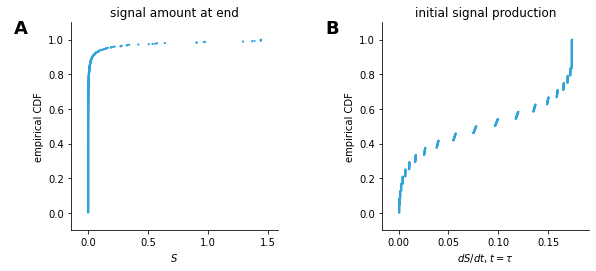

In [17]:
ecdfs = (
    lsig.ecdf(
        tc_end_fluor, label="signal amount at end"
    ).opts(
        s=5, 
        axiswise=True,
        xlabel=r"$S$",
        ylabel="empirical CDF",
    ) + lsig.ecdf(
        dS_dt_init_mean, label="initial signal production"
    ).opts(
        s=5, 
        axiswise=True,
        xlabel=r"$dS/dt$, $t=\tau$",
        ylabel="empirical CDF",
    )
)

ecdfs

In [18]:
# Threshold to decide whether lattice is activated
end_thresh = 0.05

# THreshold to decide whether lattice is initially activated
init_thresh = 0.05

In [19]:
activates = (dS_dt_init_mean > init_thresh).astype(int)
stays_active = (S_tcmean_mean[:, -1] > end_thresh).astype(int)

In [20]:
phase = 2 - activates - activates * stays_active

In [21]:
phase_colors = np.array(lsig.cols_blue)[phase]

In [22]:
buffer = 0.05

xlim = tuple([
    lsig.g_to_units(g_space[0]  - buffer * g_range),
    lsig.g_to_units(g_space[-1] + buffer * g_range),
])

ylim = tuple([
    rho_0_space[0]  - buffer * rho_0_range,
    rho_0_space[-1] + buffer * rho_0_range,
])

<hr>

In [23]:
mask = param_space_agg[:, 1] <= rho_max

In [24]:
phasediagram = hv.Points(
    (
        lsig.g_to_units(param_space_agg[mask, 0]), 
        param_space_agg[mask, 1],
    ),
).opts(
#     title = r"$\rho$ₘₐₓ = " + "{0:.2f}".format(rho_max),
    xlim = xlim,
    ylim = ylim,
    xlabel = r"growth rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5, 6),
    marker = "s",
    edgecolor = "w",
    s=60,
    c=phase_colors[mask], 
#     logx=True, 
    fontscale=1.,
#     xaxis="top",
    hooks=[lsig.remove_RT_spines],
)

:Points   [x,y]
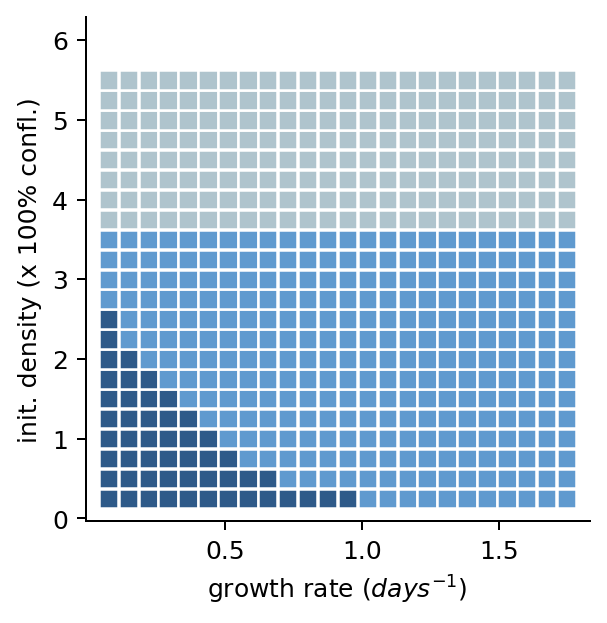

In [25]:
hv.output(phasediagram, dpi=180)

## Save

In [27]:
fname = "phasediagram_empty"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

In [29]:
if save_figs:
    hv.save(plot, fpath, dpi=250)

<hr>

## Add points to indicate selected examples

In [30]:
ONOFF_example = np.logical_and(
    param_space_agg[:, 0] == g_space[12], 
    param_space_agg[:, 1] == rho_0_space[3],
).nonzero()[0][0]

ON_example = np.logical_and(
    param_space_agg[:, 0] == g_space[3], 
    param_space_agg[:, 1] == rho_0_space[3],
).nonzero()[0][0]

OFF_example = np.logical_and(
    param_space_agg[:, 0] == g_space[12], 
    param_space_agg[:, 1] == rho_0_space[16],
).nonzero()[0][0]

examples_idx = np.array([ON_example, ONOFF_example, OFF_example])

In [31]:
examples = hv.Points(
    (
        lsig.g_to_units(param_space_agg[examples_idx, 0]), 
        param_space_agg[examples_idx, 1],
    )
).opts(
    marker="s",
    c=phase_colors[examples_idx],
    s=60,
    edgecolor="k",
    linewidth=2,
)

plot_ex = phasediagram * examples

:Overlay
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
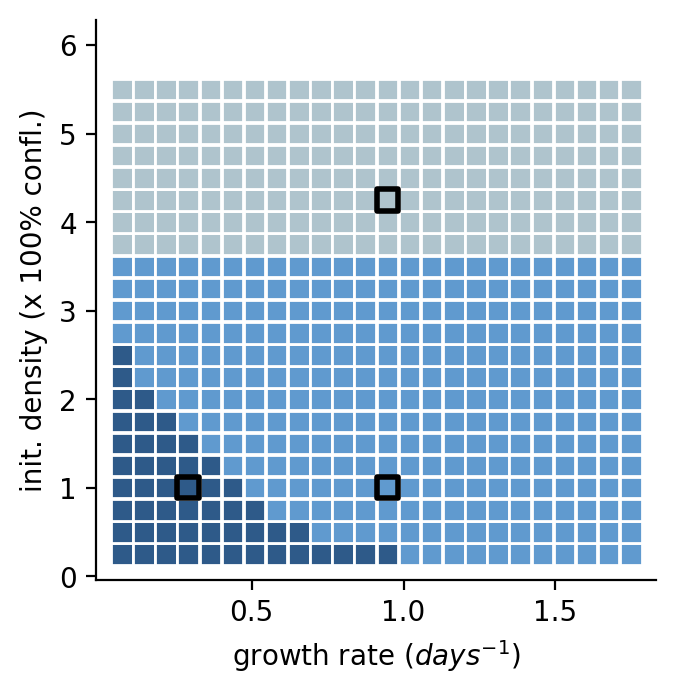

In [32]:
hv.output(plot_ex, dpi=200)

## Save

In [33]:
fname = "phasediagram_examples"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

In [34]:
if save_figs:
    hv.save(plot_ex, fpath, dpi=250)

### Plot transceiver parameters on phase diagram

In [35]:
mle_params_file = "C://Users/Pranav/git/evomorph/data/growth_parameters_MLE.csv"

In [36]:
assert os.path.exists(mle_params_file), "File does not exist"

mle_params_df = pd.read_csv(mle_params_file, index_col=0)
mle_params_df

condition  g_inv_days  rho_max_inv_mm2        sigma   g_ratio  \
0       FGF2    1.088313      7038.003027  1435.041229  1.494119   
1         RI    0.141042      7038.003027   504.595599  0.193633   
2  untreated    0.728398      7038.003027   787.495152  1.000000   

   rho_max_ratio  doubling_time_days  doubling_time_hours  
0       5.630402            0.636900            15.285609  
1       5.630402            4.914488           117.947718  
2       5.630402            0.951605            22.838514

In [43]:
params_point = hv.Points(
    [
        (mle_params_df.g_inv_days.values[2], 1.),
    ]
).opts(
    marker="^",
    c=lsig.cols_red[1],
    s=180,
    ec=lsig.col_black,
)

plot_ex_point = phasediagram * examples * params_point

:Overlay
   .Points.I   :Points   [x,y]
   .Points.II  :Points   [x,y]
   .Points.III :Points   [x,y]
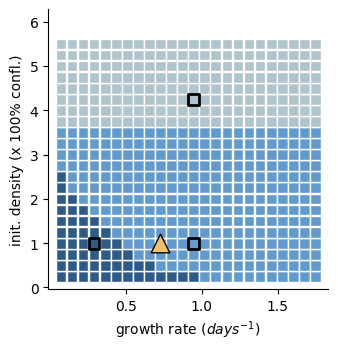

In [44]:
hv.output(plot_ex_point, dpi=100)

## Save

In [45]:
fname = "phasediagram_examples_and_tc"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

In [58]:
if save_figs:
    hv.save(plot_ex_point, fpath, dpi=250)

<hr>

## Plot time-series of examples

In [47]:
# Sub-sample time-points
sample_skip = 25
t_sample = t[::sample_skip].copy()
pct_example_sample = S_actnum_mean[examples_idx, ::sample_skip] * 100 / n

In [48]:
# Make data
example_data_list = [
    dict(
        t=t_sample,
        example=[i] * t_sample.size,
        pct=pct_example_sample[i],
    )
    for i, _ in enumerate(examples_idx)
]

In [50]:
# Plot
example_plots = [
    hv.Curve(
        example_data_list[i],
        kdims=["t"],
        vdims=["pct"],
    ).opts(
        xlabel="time",
        xticks=0,
        ylabel=("", "% activated cells", "")[i],
        yticks=[0, 100],
        ylim=(-5, 105),
        linewidth=10,
        fontscale=3,
        color=phase_colors[examples_idx][i],
    )
    for i, _ in enumerate(examples_idx)
]

:Layout
   .Curve.I   :Curve   [t]   (pct)
   .Curve.II  :Curve   [t]   (pct)
   .Curve.III :Curve   [t]   (pct)
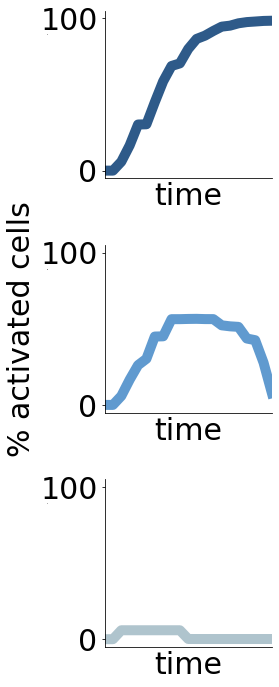

In [51]:
examples_overlay = hv.Layout(example_plots).opts(vspace=0.4, sublabel_size=0).cols(1)
examples_overlay

## Save

In [788]:
fname = "phasediagram_examples_timeseries"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

In [789]:
if save_figs:
    hv.save(examples_overlay, fpath, dpi=250)

<hr>

# Plot stimulated area

In [790]:
import cmocean as cm
import cmocean.cm as cmo

In [875]:
stimulated_plot = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    xlim = xlim,
    ylim = (ylim[0] * 18/25, ylim[1] * 18/25),
    aspect = 25/18,
    xlabel = r"growth rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5),
    marker = "s",
#     edgecolor = "w",
    s=65,
    c="w",
#     c=stimulated_pct[mask],
#     cmap=cmo.algae,
    colorbar=True,
#     logx=True, 
    fontscale=1.,
)

stimulated_points_outline = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    marker = "s",
    edgecolor = "k",
    linewidth=2,
    s=65,
)

stimulated_var_points = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[mask, 0]), 
        param_space_agg[mask, 1],
    ),
).opts(
    marker=".",
    s=130 * R_stimulated_pct[mask],
    c="k",
)

# stimulated_sat_points = hv.Scatter(
#     (
#         lsig.g_to_units(param_space_agg[phase==0, 0]), 
#         param_space_agg[phase==0, 1],
#     ),
# ).opts(
#     marker="s",
#     s=70,
#     c="k",
# )

stimulated_overlay = stimulated_points_outline * stimulated_plot * stimulated_var_points

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Scatter.II  :Scatter   [x]   (y)
   .Scatter.III :Scatter   [x]   (y)
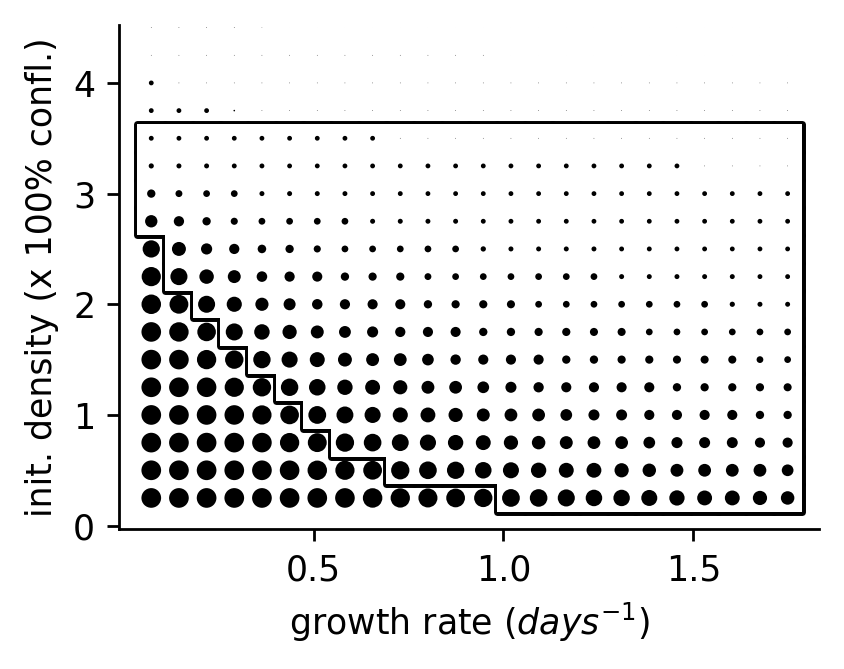

In [876]:
hv.output(stimulated_overlay, dpi=250)

## Save

In [794]:
fname = "phasediagram_percent_stimulated"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

In [795]:
if save_figs:
    hv.save(stimulated_overlay, fpath, dpi=250)

In [883]:
np.array([
    [R_stimulated_pct[phase == 0].min(), R_stimulated_pct[phase == 0].max()],
    [R_stimulated_pct[phase == 1].min(), R_stimulated_pct[phase == 1].max()],
    [R_stimulated_pct[phase == 2].min(), R_stimulated_pct[phase == 2].max()],
])

array([[0.75998, 0.98918],
       [0.00122, 0.85376],
       [0.     , 0.05876]])

In [884]:
x_stretch = (2 - xlim[0]) / (xlim[1] - xlim[0])

stimulated_plot2 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    xlim = (xlim[0], 2),
    ylim = (ylim[0] * 18/25, ylim[1] * 18/25),
    aspect = 25/18 * x_stretch,
    xlabel = r"growth rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5),
    marker = "s",
#     edgecolor = "w",
    s=70,
    c="w",
#     c=stimulated_pct[mask],
#     cmap=cmo.algae,
#     colorbar=True,
#     logx=True, 
    fontscale=1.,
)

stimulated_points_outline2 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    marker = "s",
    edgecolor = "k",
    linewidth=2,
    s=70,
)

stimulated_var_points2 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[phase == 1, 0]), 
        param_space_agg[phase == 1, 1],
    ),
).opts(
    marker=".",
    s=130 * R_stimulated_pct[phase == 1],
    c="k",
)

var_points_scale = hv.Scatter(
    (1.95 * np.ones(11), np.linspace(0.25, 4.25, 11))
).opts(
    marker=".",
    s=130 * np.arange(1, -0.01, -0.1),
    c="k",
#     aspect=0.1
)

stimulated_overlay2 = stimulated_points_outline2 * stimulated_plot2 * stimulated_var_points2 * var_points_scale

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Scatter.II  :Scatter   [x]   (y)
   .Scatter.III :Scatter   [x]   (y)
   .Scatter.IV  :Scatter   [x]   (y)
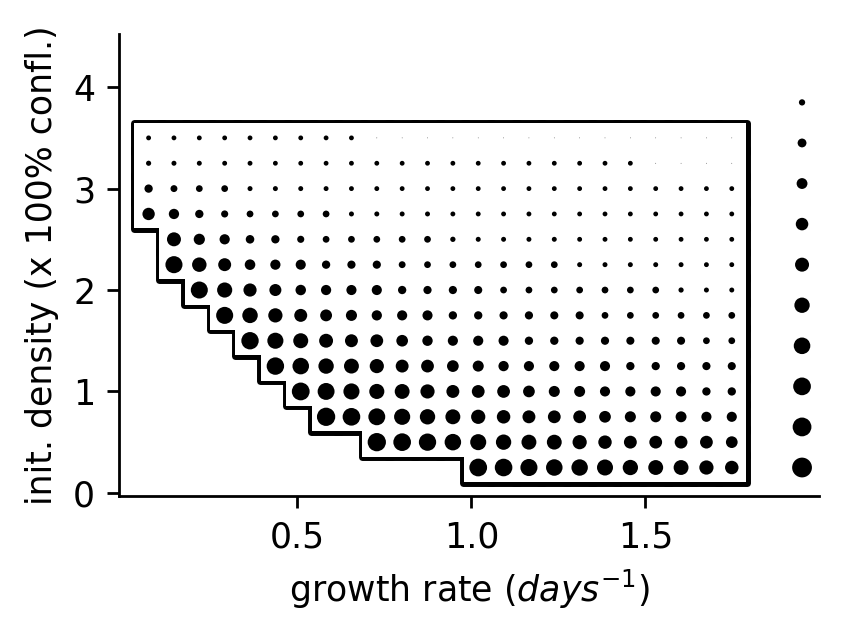

In [899]:
hv.output(stimulated_overlay2, dpi=250)

In [881]:
R_stimulated_pct[phase == 1].min(), R_stimulated_pct[phase == 1].max()

(0.00122, 0.8537600000000001)

## Save

In [900]:
fname = "phasediagram_percent_stimulated_version2"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

if save_figs:
    hv.save(stimulated_overlay2, fpath, dpi=250)

__Make version just based on percent stimulation__

In [890]:
x_stretch = (2 - xlim[0]) / (xlim[1] - xlim[0])

stim_mask = np.logical_and(R_stimulated_pct > 0.05, R_stimulated_pct < 0.95)

stimulated_plot3 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[stim_mask, 0]), 
        param_space_agg[stim_mask, 1],
    ),
).opts(
    xlim = (xlim[0], 2),
    ylim = (ylim[0] * 18/25, ylim[1] * 18/25),
    aspect = 25/18 * x_stretch,
    xlabel = r"growth rate ($days^{-1}$)",
    xticks = (0.5, 1.0, 1.5),
    ylabel = r"init. density (x 100% confl.)",
    yticks = (0, 1, 2, 3, 4, 5),
    marker = "s",
#     edgecolor = "w",
    s=70,
    c="w",
#     c=stimulated_pct[mask],
#     cmap=cmo.algae,
#     colorbar=True,
#     logx=True, 
    fontscale=1.,
)

stimulated_points_outline3 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[stim_mask, 0]), 
        param_space_agg[stim_mask, 1],
    ),
).opts(
    marker = "s",
    edgecolor = "k",
    linewidth=2,
    s=70,
)

stimulated_var_points3 = hv.Scatter(
    (
        lsig.g_to_units(param_space_agg[stim_mask, 0]), 
        param_space_agg[stim_mask, 1],
    ),
).opts(
    marker=".",
    s=130 * R_stimulated_pct[stim_mask],
    c="k",
)


stimulated_overlay3 = stimulated_points_outline3 * stimulated_plot3 * stimulated_var_points3 * var_points_scale

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Scatter.II  :Scatter   [x]   (y)
   .Scatter.III :Scatter   [x]   (y)
   .Scatter.IV  :Scatter   [x]   (y)
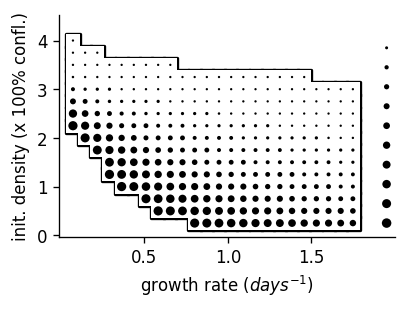

In [891]:
hv.output(stimulated_overlay3, dpi=120)

## Save

In [844]:
fname = "phasediagram_percent_stimulated_version3"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

In [898]:
if save_figs:
    hv.save(stimulated_overlay3, fpath, dpi=250)

<hr>

## Make a bare version of phase diagram indicating perturbed conditions

In [56]:
phasediagram_bare = phasediagram.options(dict(
    Points=dict(edgecolor=None, s=65)
)).opts(
    xaxis=None,
    yaxis=None,
)

dens_drug_points = hv.Points(
    [
        (mle_params_df.g_inv_days.values[2], 1.),
        (mle_params_df.g_inv_days.values[2], 2.),
        (mle_params_df.g_inv_days.values[2], 4.),
        (mle_params_df.g_inv_days.values[0], 1.),
        (mle_params_df.g_inv_days.values[1], 1.),
    ]
).opts(
    marker="^",
    c=[*lsig.yob[1:], lsig.purple, lsig.greens[3]],
    s=250,
    ec=lsig.col_black,
)

dens_drug_bare_overlay = phasediagram_bare * dens_drug_points

:Overlay
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
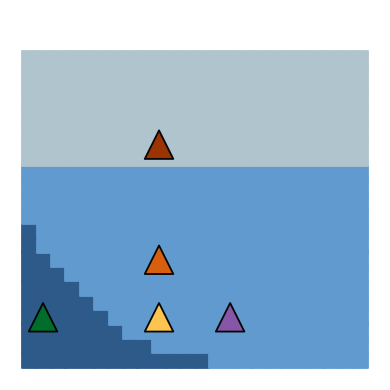

In [57]:
hv.output(dens_drug_bare_overlay, dpi=130)

## Save

In [59]:
fname = "phasediagram_with_densities_and_drugs"
fmt = "png"
fpath = os.path.abspath(os.path.join(save_dir, fname + "." + fmt))

In [60]:
if save_figs:
    hv.save(dens_drug_bare_overlay, fpath, dpi=dpi)

<hr>

### Functions to approximate critical values of phase boundary

In [8]:
@numba.njit
def t_crit_approx(g, rho_0, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return -1/g * np.log((rho_max - rho_crit) / rho_crit * rho_0 / (rho_max - rho_0) )

In [9]:
@numba.njit
def t_crit_approx_levelset(t_crit, g, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

In [10]:
@numba.njit
def t_crit_approx_nodilution(g, rho_0, rho_max, rho_crit):
    return -1/g * np.log((rho_max - rho_crit) / rho_crit * rho_0 / (rho_max - rho_0) )

In [11]:
@numba.njit
def t_crit_approx_levelset_nodilution(t_crit, g, rho_max, rho_crit):
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

<hr>

In [ ]:
tol = 1e-5

In [220]:
which_growing = (rho_max - param_space_agg[:, 1]) >= -tol

In [77]:
# Total area of well
# total_area = 3.2e7  # um^2 
total_area = 32     # mm^2 

# Approximate critical density in dimensionless units
rho_crit_approx_nodilution = 3.    # real units = dimensionless x 1250 mm^-2

In [78]:
max_act_num = S_actnum_mean.max(axis=1) 

max_act_prop = max_act_num / n 
max_act_area = max_act_prop * total_area 

In [79]:
mask = which_growing

area_data = {
    "g": param_space_agg[mask, 0], 
    "rho_0": param_space_agg[mask, 1],
    "area": max_act_area[mask],
}

plot = hv.Points(
    area_data,
    kdims=["g", "rho_0"],
    vdims=["area"],
).opts(
    title = r"$\rho$ₘₐₓ = " + "{0:.2f}".format(rho_max),
    xlim = ( 0, 2.5),
    ylim = ( 0, 6.0),
    xlabel = r"$g$",
    xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
    ylabel = r"$\rho_0$",
    yticks = (0, 2, 4, 6, 8),
#     marker = "s",
    s=35,
#         c=np.array(cc.glasbey_warm)[phase[mask]], 
    color="area",
    clabel=r"area $(mm^2)$",
    cmap="viridis",
    colorbar=True,
#     logx=True, 
    fontscale=1.5,
#         xaxis="top",
        hooks=[lsig.remove_RT_spines],
).redim.range(**{"area": (0, total_area)})


In [11]:
@numba.njit
def t_crit_approx_levelset_nodilution(t_crit, g, rho_max, rho_crit):
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

In [312]:
continuous_propagation = np.logical_and(starts_below_crit, ~reaches_max)

In [313]:
continuous_propagation.sum()

25

In [422]:
t_crits = np.array([0, 2, 4, 6]) / lsig.t_to_units(1)

In [374]:
gsize=100
g_min, g_max = g_space.min(), g_space.max()
g_range = np.linspace(g_min, g_max, gsize)

## Plot time of critical signaling collapse in the rho0-g plane
# Get the boundary in the rho0-g plane
rho0_tcls_0 = t_crit_approx_levelset_nodilution(
    0, g_range, rho_max, rho_crit_approx_nodilution
)

# Plot boundary 
tcls0 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_0))
).opts(
#     linestyle="dashed",
    linewidth=2,
    c=cc.glasbey_category10[1],
)

rho0_tcls_1 = t_crit_approx_levelset_nodilution(
    1, g_range, rho_max, rho_crit_approx_nodilution
)
tcls1 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_1))
).opts(
    linestyle="dashed",
    linewidth=2,
    c=cc.glasbey_warm[3]
)

rho0_tcls_2 = t_crit_approx_levelset_nodilution(
    2, g_range, rho_max, rho_crit_approx_nodilution
)
tcls2 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_2))
).opts(
    linestyle="dashed",
    linewidth=3,
    c=cc.glasbey_cool[5]
)

rho0_tcls_3 = t_crit_approx_levelset_nodilution(
    3, g_range, rho_max, rho_crit_approx_nodilution
)

tcls3 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_3))
).opts(
    linestyle="dashed",
    linewidth=3,
    c=cc.glasbey_cool[9]
)

rho0_tcls_5 = t_crit_approx_levelset_nodilution(
    5, g_range, rho_max, rho_crit_approx_nodilution
)

tcls5 = hv.Curve(
    (lsig.g_to_units(g_range), lsig.rho_to_units(rho0_tcls_5))
).opts(
    linestyle="dashed",
    linewidth=3,
    c=cc.glasbey_cool[10]
)

In [432]:
rho0_tcls_arr = [
    t_crit_approx_levelset_nodilution(
        i, g_range, rho_max, rho_crit_approx_nodilution
    ) for i in t_crits
]

tcls_data = {
    "t_crit": (np.repeat([f"{lsig.t_to_units(i):.1f}" for i in t_crits], gsize)),
    "g_range": np.tile(lsig.g_to_units(g_range), len(t_crits)),
    "rho_0": lsig.rho_to_units(np.concatenate(rho0_tcls_arr)),
}

# tcls_data = {
#     "t_crit": (np.repeat([f"{lsig.t_to_units(i):.2f}" for i in [0, 1, 2, 3, 5]], gsize)),
#     "g_range": np.tile(lsig.g_to_units(g_range), 5),
#     "rho_0": lsig.rho_to_units(np.concatenate([rho0_tcls_0, rho0_tcls_1, rho0_tcls_2, rho0_tcls_3, rho0_tcls_5])),
# }

tcls_overlay = hv.Curve(
    tcls_data,
    kdims=["g_range",],
    vdims=["rho_0", "t_crit"],
).groupby(
    "t_crit"
).opts(
    linestyle="dashed",
    linewidth=3,
    color="t_crit",
).overlay(
).opts(
    fontscale=1.5,
    show_legend=False, 
    legend_position="right",
#     legend_title=r"$t_{crit}$ (days)",
).options(
    {"Curve": dict(color=hv.Cycle(cc.glasbey_cool))}
)

In [433]:
mask = which_growing

area_data = {
    "growth rate": lsig.g_to_units(param_space_agg[mask, 0]), 
    "initial density": param_space_agg[mask, 1] * 1250,
    "area": max_act_area[mask],
}

cont_prop_points = hv.Points(
    (lsig.g_to_units(param_space_agg[continuous_propagation, 0]),
     lsig.rho_to_units(param_space_agg[continuous_propagation, 1]))
).opts(
    c="k",
    s=15,
    marker="^",
)

plot = hv.Points(
    area_data,
    kdims=["growth rate", "initial density"],
    vdims=["area"],
).opts(
#     title = r"$\rho$ₘₐₓ = {0:.0f} $cells/mm^2$".format(lsig.rho_to_units(rho_max)),
#     xlim = ( 0, 2.5),
#     ylim = ( 0, 6.0),
    xlabel = r"growth rate ($days^{-1}$)",
#     xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
    ylabel = r"initial density ($cells\,/\,mm^2$)",
#     yticks = (0, 2, 4, 6, 8),
#     marker = "s",
    s=35,
#         c=np.array(cc.glasbey_warm)[phase[mask]], 
    color="area",
    clabel=r"max. area $(mm^2)$",
    cmap="viridis",
    colorbar=True,
#     logx=True, 
    fontscale=1.5,
#         xaxis="top",
        hooks=[lsig.remove_RT_spines],
).redim.range(
    **{"area": (0, total_area)}
) 


:NdOverlay   [t_crit]
   :Curve   [g_range]   (rho_0,t_crit)
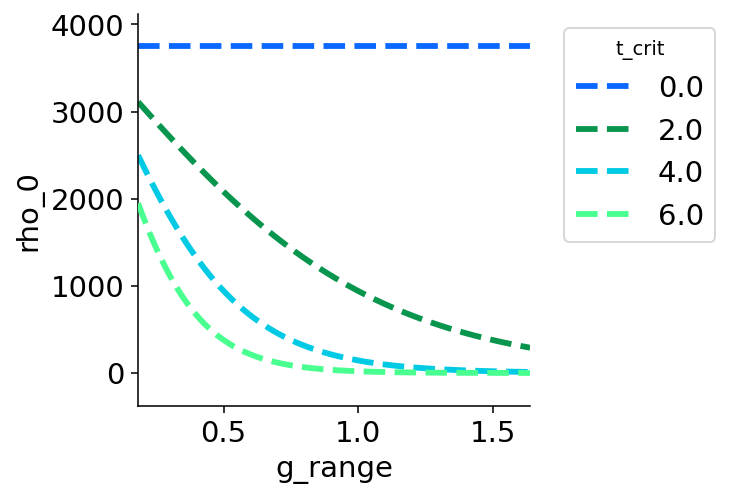

In [434]:
hv.output(tcls_overlay.opts(show_legend=True),dpi=140)

<hr>